# Diabetes classification using KNN

In [1]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### No null values.
But there could be invalid vlaues in columns. Lets check

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose, 
BloodPressure, 
SkinThickness, 
Insulin, 
BMI
<br>
columns have values 0 which does not ake sense , hence are missing values

In [15]:
# Lets make a copy and work on the copy. The copy will have all the clean preprocessed data in it.
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To fill these Nan values the data distribution needs to be understood

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

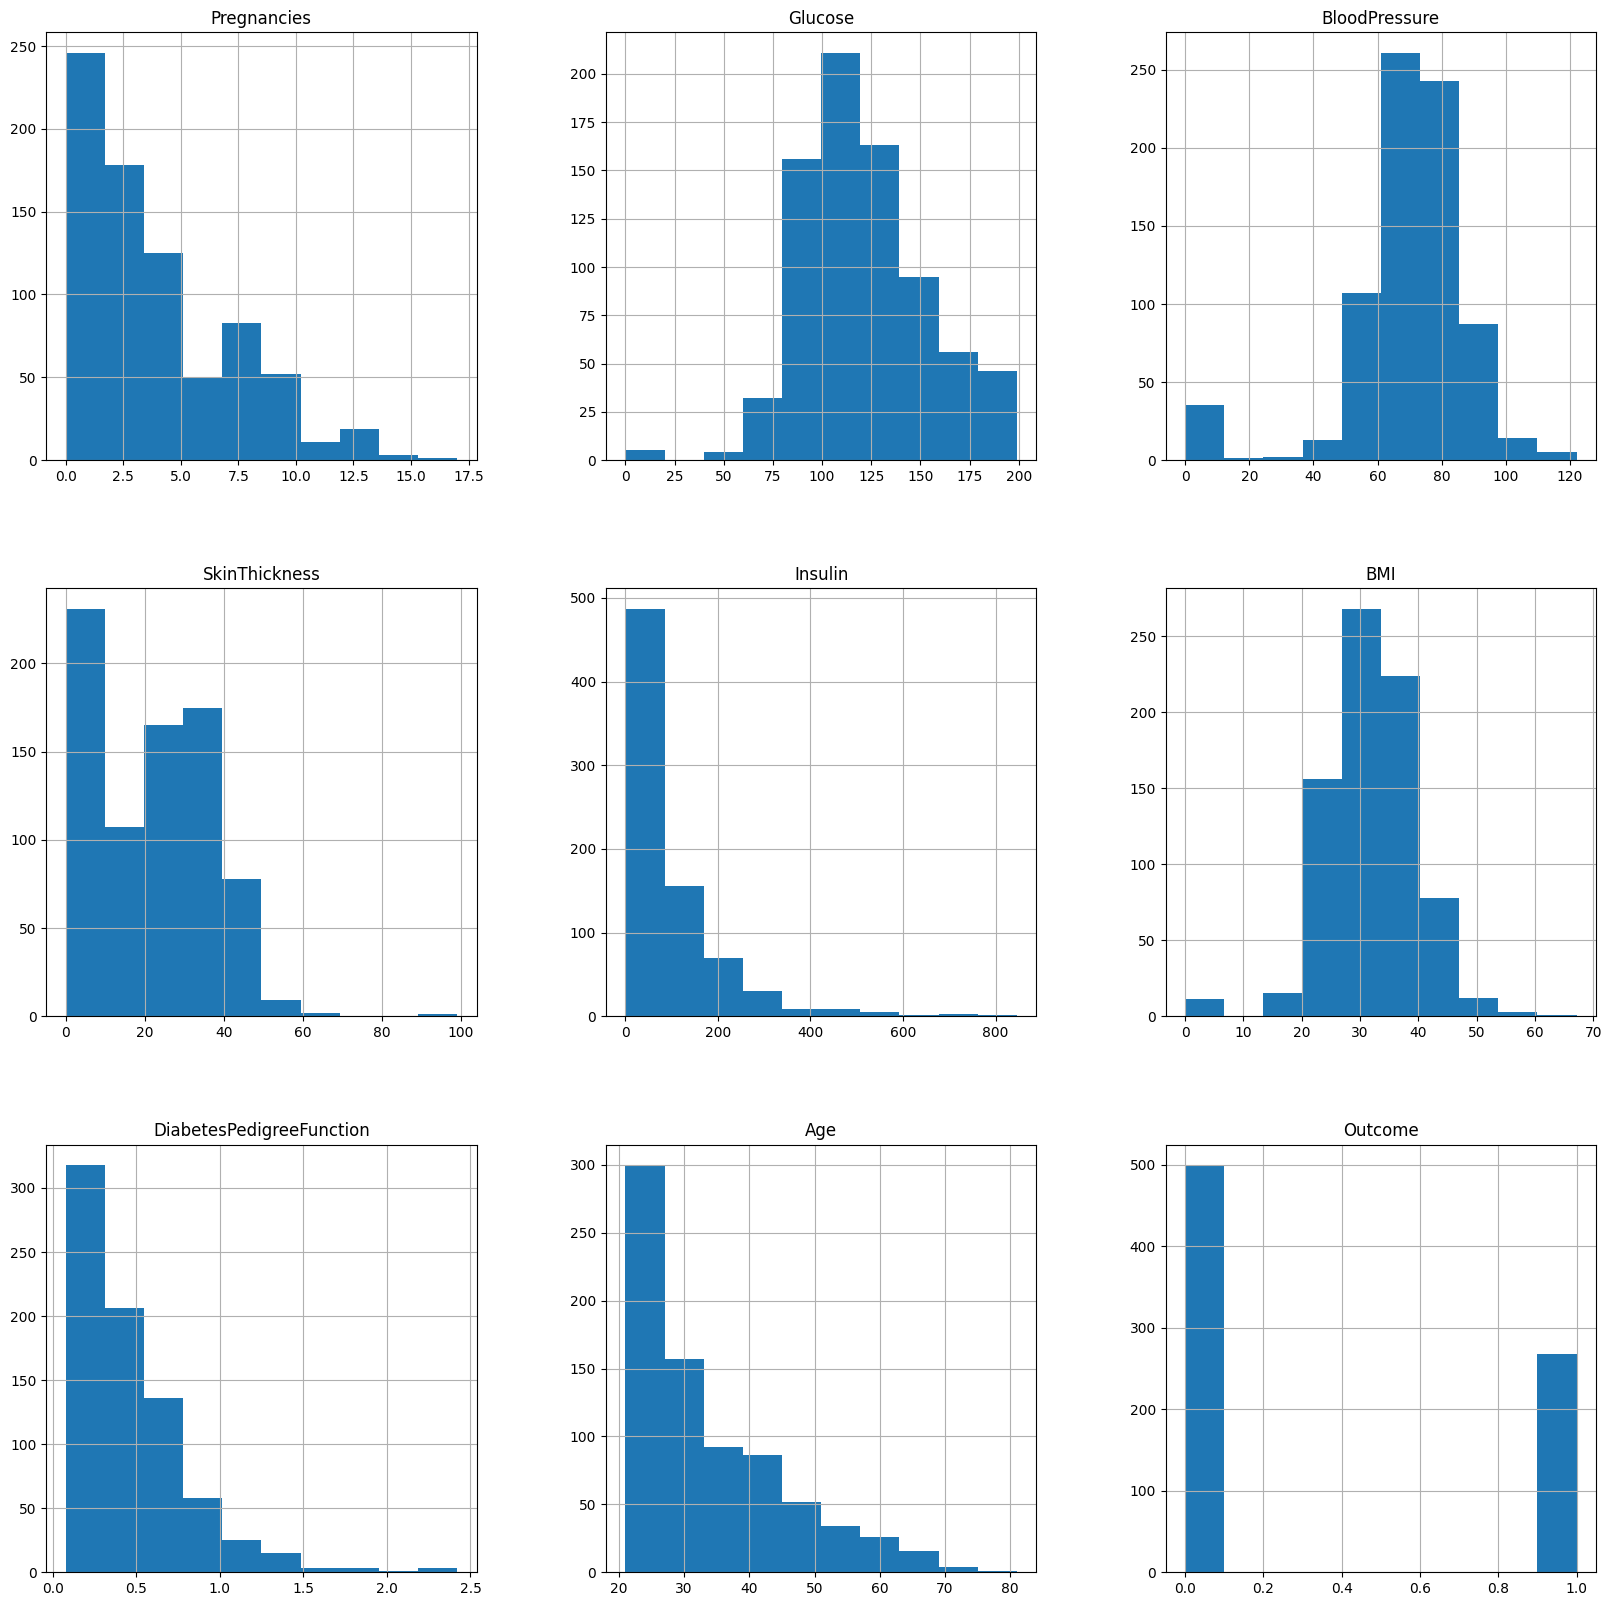

In [16]:
df.hist(figsize = (20,20))

In [17]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)


df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

C:\Users\hi\AppData\Local\Temp\ipykernel_16692\1405681830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
C:\Users\hi\AppData\Local\Temp\ipykernel_16692\1405681830.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

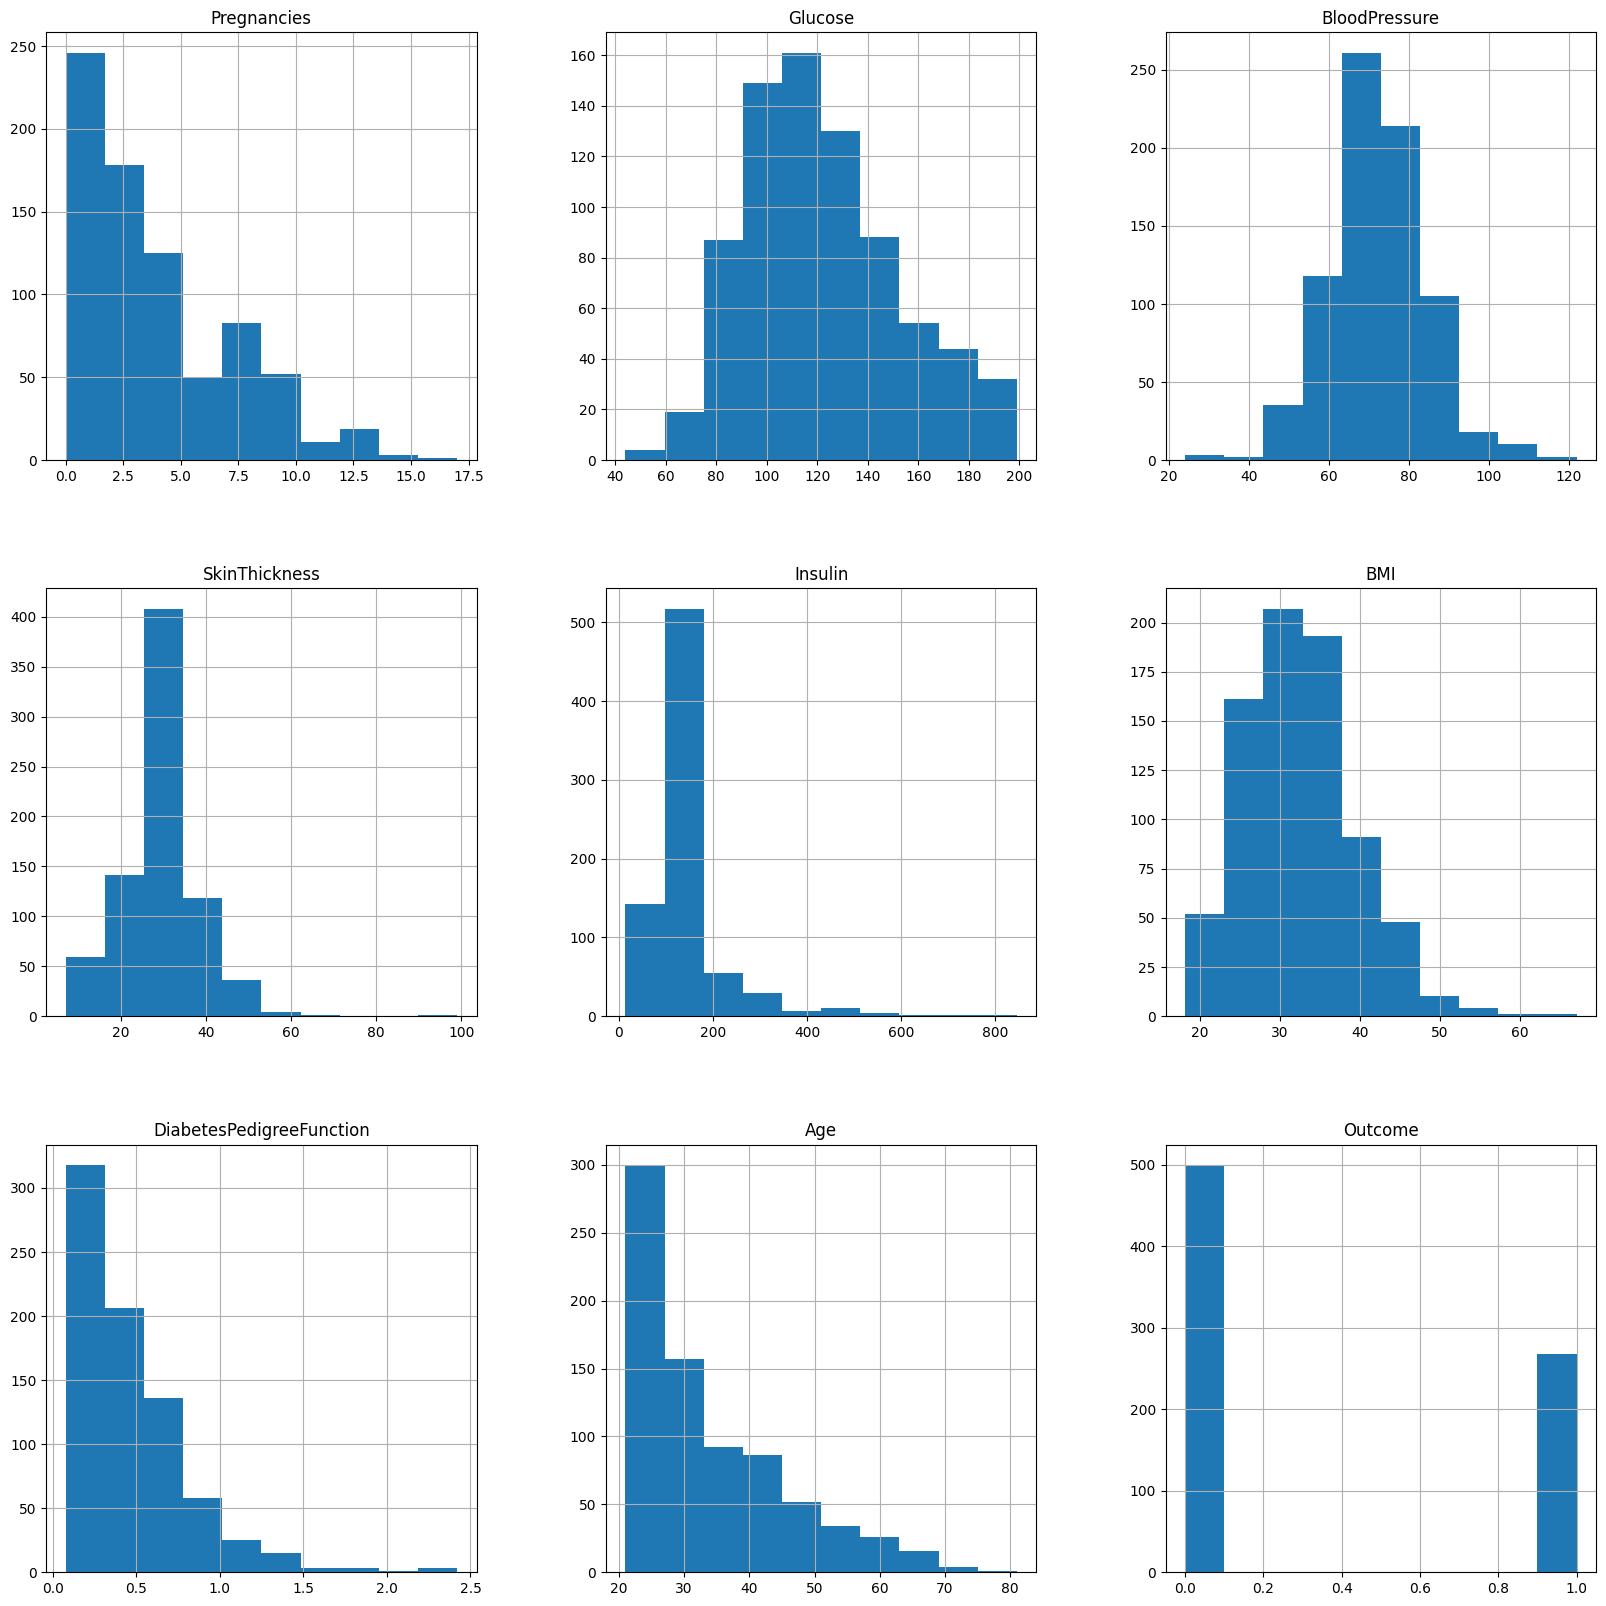

In [18]:
# Lets look at histogram after filling missing values
df_copy.hist(figsize = (20,20))

<Axes: xlabel='Outcome'>

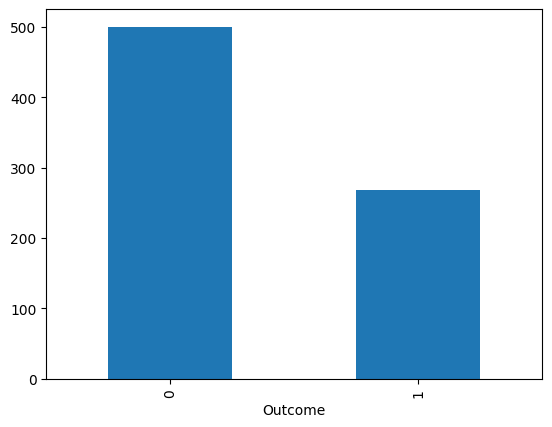

In [19]:
df.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

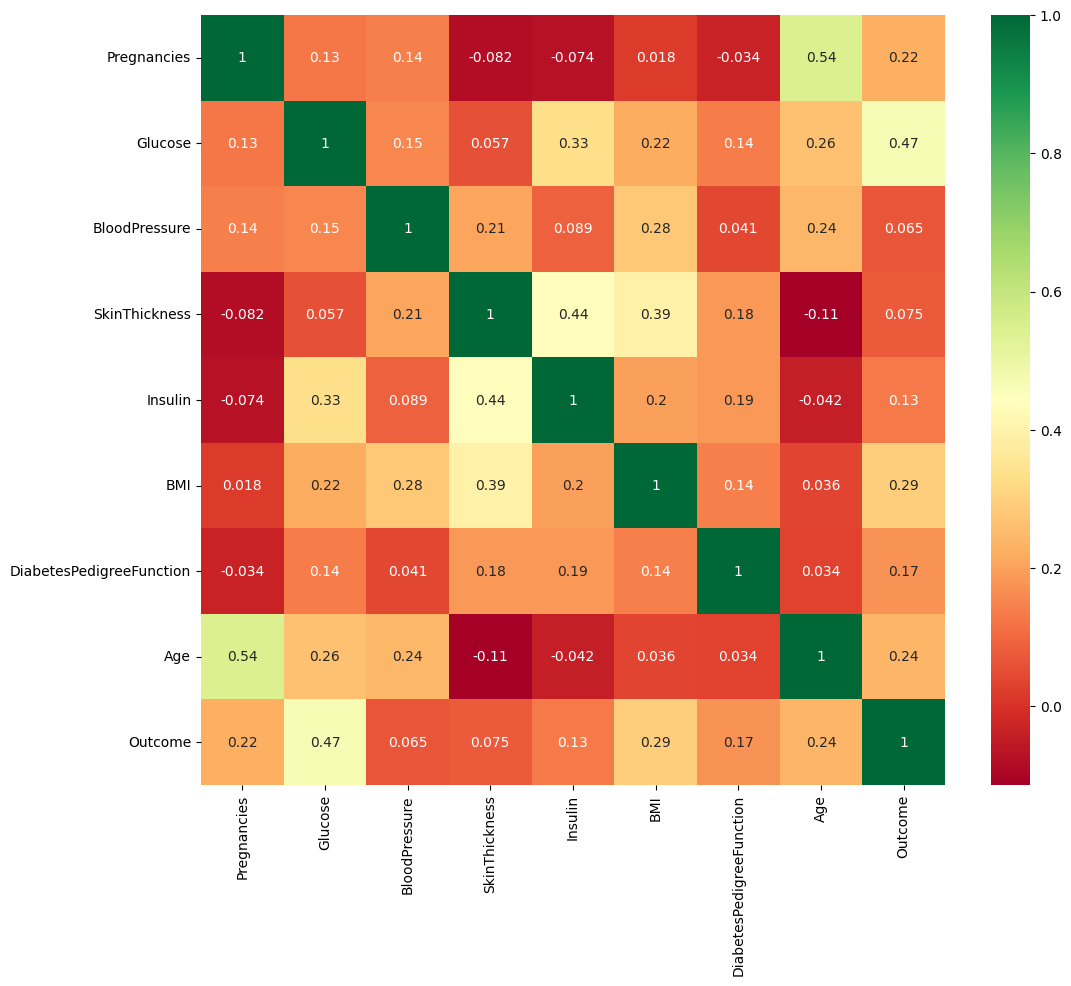

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

From the original un processed data it seems that outcome has high correlation with Age, DiabetePedigreeFunctin, Glucose

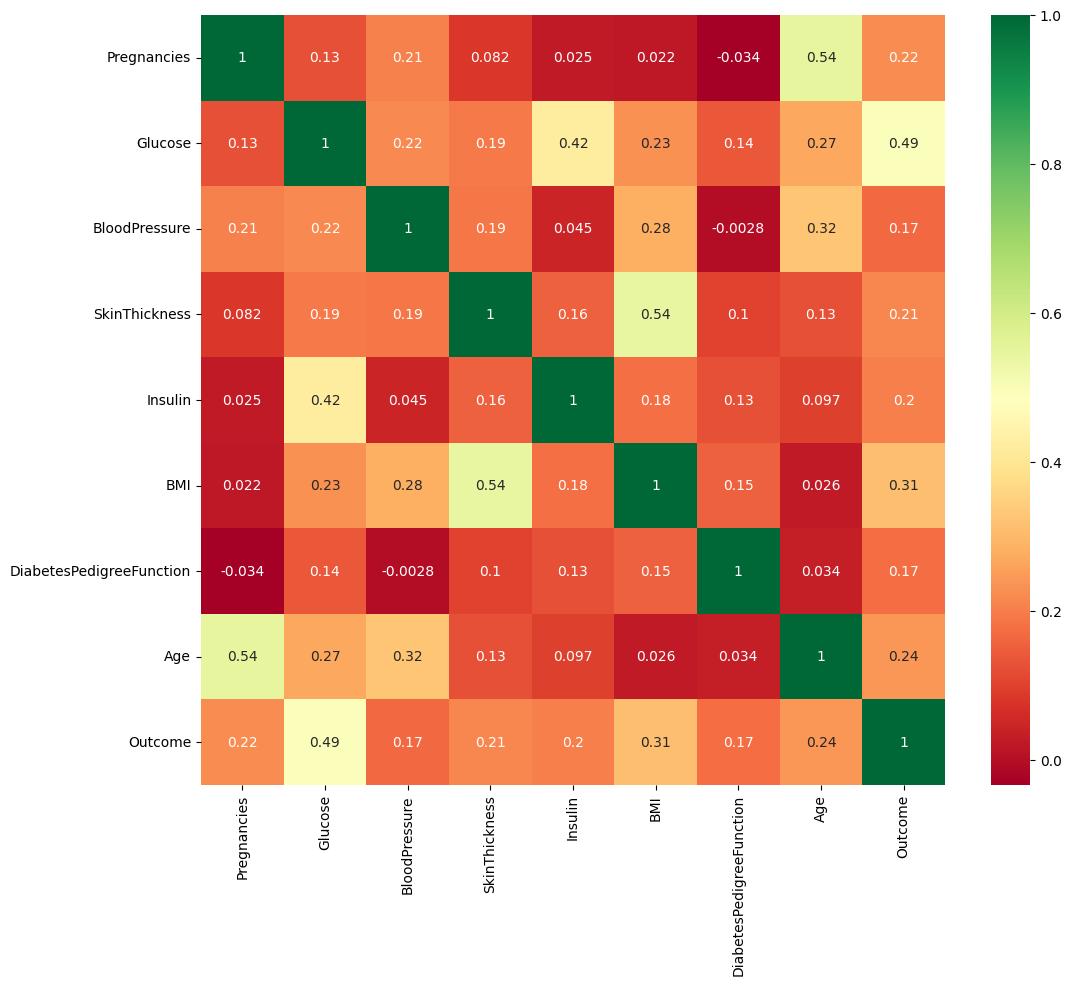

In [22]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
From the preprocesed data, it seems that outcome has correlation with Glucose, BMI, Age, DiabetesPedgreeFunction

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"], axis =1),),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [26]:
# This is the target/response variable
y =df_copy.Outcome

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify=y)

### find right value of K

In [36]:
# Lets track the model's performance on both training and test data.
# It helps determine the optimal k value that gives the highest test accuracy.
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

max_test_score =max(test_scores)
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 75.32467532467533 % and k = [5]


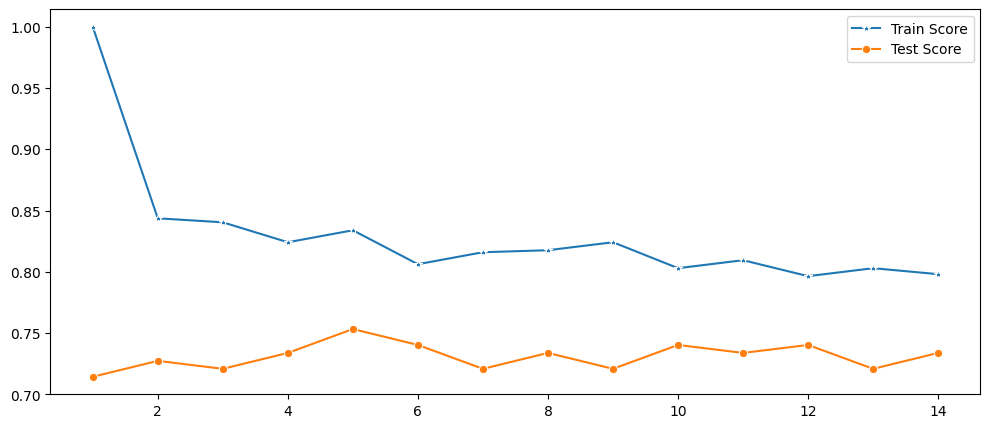

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,15),y=train_scores,marker='*',label='Train Score')
sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')

We see that when K=1, the training acc =1, that makes sense because it is overfitting and all points are within their own clusters. Around k=5, the testing acc goes max to 75%. This is good.

#### lets try to find K using k-fold cross-validation 


In [38]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 15)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())  # Store mean accuracy

# Get best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k} with accuracy {max(cv_scores) * 100:.2f}%")


Best k: 13 with accuracy 77.20%


Interesting. at K=13, accuray=77%

### lets use elbow method to find K
This is visual graphical method

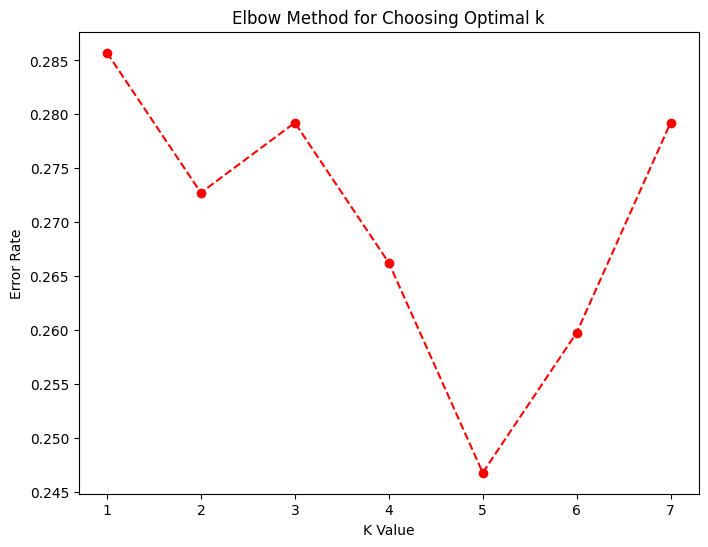

In [42]:
error_rates = []
k_max=8
for k in range(1, k_max):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append((y_test != y_pred).mean())  # Misclassification rate

plt.figure(figsize=(8, 6))
plt.plot(range(1, k_max), error_rates, marker='o', linestyle='dashed', color='r')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Choosing Optimal k")
plt.show()


The graph is not actually in the shape or elbow, but it does show that k=5 seems right.

### Let try GridSearch to find K

In [44]:
from sklearn.model_selection import GridSearchCV
k_max=15
param_grid = {'n_neighbors': range(1, k_max)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best k: {grid_search.best_params_['n_neighbors']} with accuracy {grid_search.best_score_ * 100:.2f}%")


Best k: 13 with accuracy 77.20%


##### So we choose k=13


In [53]:
# Define the model: Init K-NN. P=2 because there are only 2 classes
n_neighbors = 13
knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=2,metric='euclidean') 
# Fit Model
knn.fit(X_train, y_train)
# # Predict the test set results
# y_pred = classifier.predict(X_test)
# y_pred

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

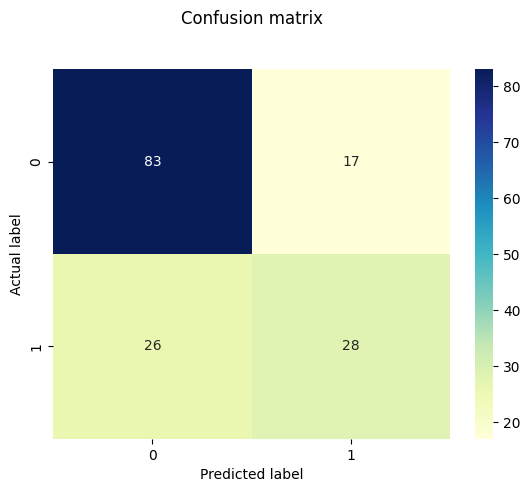

In [55]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.720779,0.622222,0.518519,0.565657,0.536398


In [57]:
# Alternate way
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [58]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

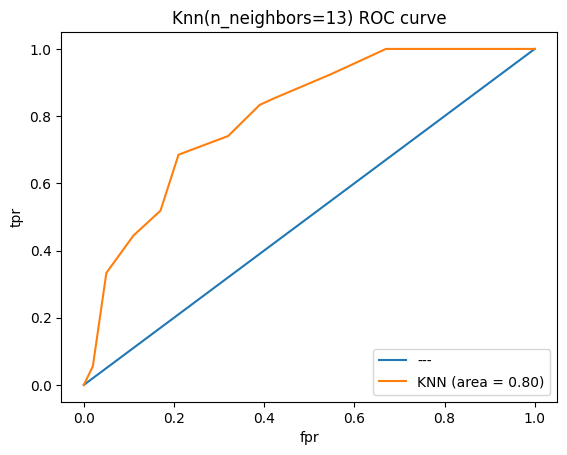

In [60]:
classifier_roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], label = "---")
 
plt.plot(fpr, tpr, label ='KNN (area = %0.2f)' % classifier_roc_auc)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title(f'Knn(n_neighbors={n_neighbors}) ROC curve')
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

The curve should be as close to y axis when going up and close to top x aixis when going right.